In [42]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#px.set_mapbox_acess_token(open("mapbox_token").read()) #API que ajuda a visualizar graficos de 

In [43]:
#Ler o dataset disponivel no Kaggle
df_data = pd.read_csv("sao-paulo-properties-april-2019.csv")

In [44]:
#Ler apenas as primeiras linhas juntamente com o cabeçalho
df_data.head() 

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [45]:
#Selecionando os valores do dataset apenas se o Negotiation Type for rent
df_rent = df_data[df_data["Negotiation Type"]=="rent"] 

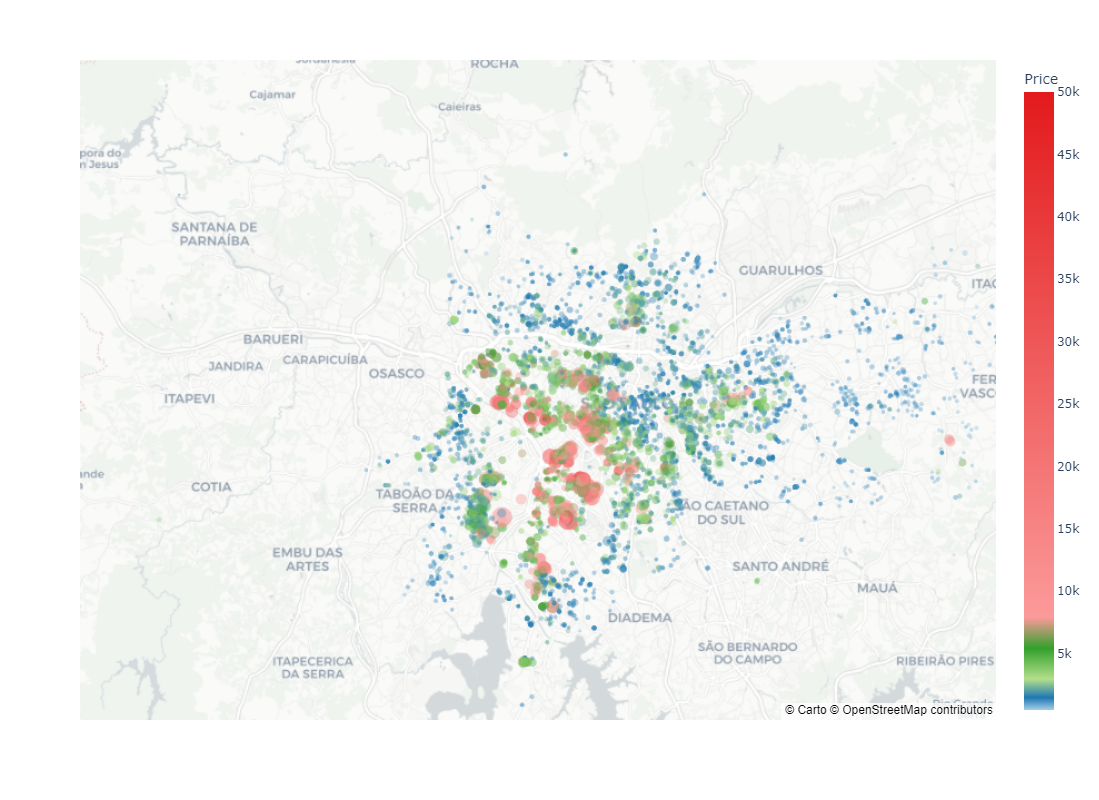

In [46]:
#Criando o mapa para visualização dos preços
#o lat e o lon é onde ele vai encontrar as informações de latitude e longitude, nesse caso são nas colunas presentes no dataset. Existe também a seleção do tipo e da cor
#O mapa criado mostra os locais de maiores e menos preços, retornando os preços também
fig = px.scatter_mapbox(df_rent, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Price", 
                        size="Size", 
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10, 
                        opacity=0.4,
                        mapbox_style="carto-positron") #Estilo do mapa

#Fazendo uma lista com a escala de cor, definindo as cores. No finaç irá aparecer na barra da direita
fig.update_coloraxes(colorscale =[[0, 'rgb(166,206,227, 0.5)'],
                                 [0.02, 'rgb(31,120,180,0.5)'],
                                 [0.05, 'rgb(178,223,138,0.5)'],
                                 [0.10, 'rgb(51,160,44,0.5)'],
                                 [0.15, 'rgb(251,154,153,0.5)'],
                                 [1, 'rgb(227,26,28,0.5)']
                                 ],
                    ) 
# Centralizando o mapa e colocando a altura
fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(lat=-23.543138, lon=-46.69486)))
fig.show()

In [47]:
#Visão geral sobre as colunas e a contagem de valores nulos
df_rent.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

In [48]:
#Mais detalhes sobre cada coluna (media,minimo,maximo, etc)
df_rent.describe() 

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

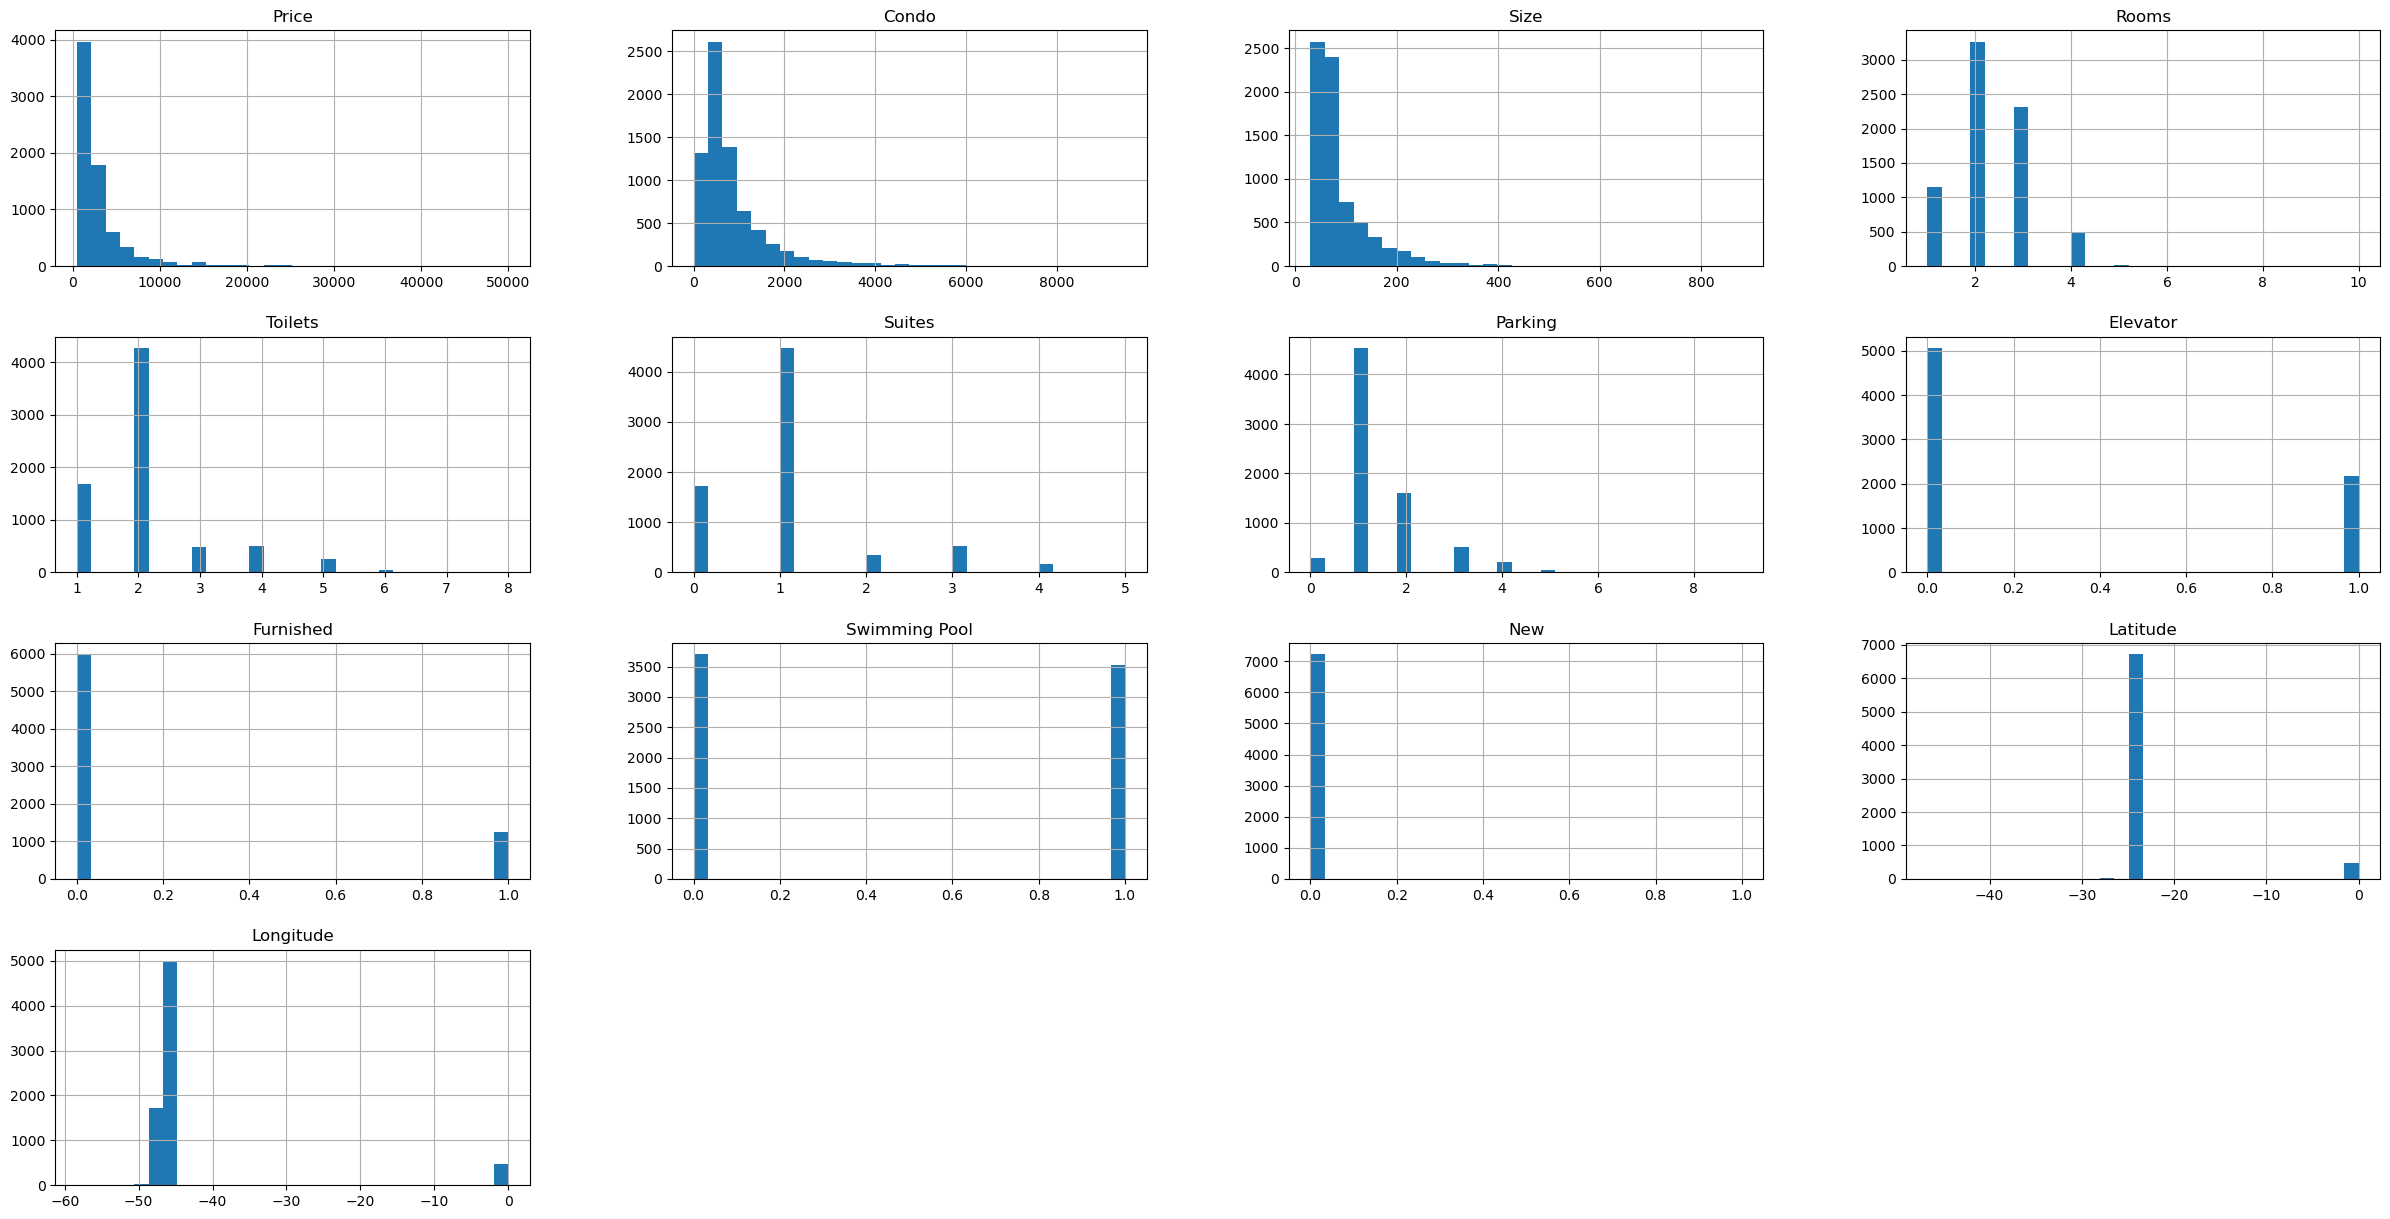

In [49]:
#Mostra a distribuição dos valores em cada coluna em estilo de gráfico
df_rent.hist(bins=30, figsize=(30, 15)) 

In [50]:
#Verificar alguma informação específica
df_rent["Property Type"].value_counts() 

Property Type
apartment    7228
Name: count, dtype: int64

In [51]:
df_rent["District"].value_counts() 

District
Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: count, Length: 94, dtype: int64

In [52]:
# Selecionar apenas as colunas numéricas
numeric_df_rent = df_rent.select_dtypes(include=[np.number])

# Calcular a correlação
correlation_matrix = numeric_df_rent.corr()

# Ordenar os valores da coluna 'Price' em ordem decrescente
#Matriz de correlação, em cada ponto é calculada a correlação entre as duas variaveis
sorted_correlation = correlation_matrix["Price"].sort_values(ascending=False) 

# Exibir a correlação ordenada
print(sorted_correlation)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64


### Preparação de dados para Modelos de ML

In [53]:
import sklearn

In [54]:
# Dropando as colunas que possuem valores iguais e não serão utilizadas no treinamento
df_cleaned = df_rent.drop(["New", "Property Type", "Negotiation Type"], axis=1)

### Tratamento de dados categóricos

In [55]:
#Ordinal é bom quando possui poucas classes
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

#O fit_tranform vai analisar a coluna passada, criar numeros e guardar dentro da variavel
district_encoded = ordinal_encoder.fit_transform(df_rent[["District"]])

In [56]:
#Exemplo da numeracao
district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

In [57]:
#Outra forma de fazer a enumeração
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

#Classe sparse matrix, o hot retorna em forma de colunas cada distrititos populados com 0 e 1
housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[["District"]])
housing_cat_1hot


<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [58]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
#Utilizando a propria função do Pandas para fazer a mesma coisa que o hot
one_hot = pd.get_dummies(df_cleaned["District"])

df = df_cleaned.drop('District', axis = 1)
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1000,148,45,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,1000,100,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,1000,200,48,2,2,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,1300,410,55,2,2,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
11206,21000,3000,208,4,4,3,3,1,1,1,...,False,False,False,False,False,False,False,False,False,False
11207,3800,710,55,1,1,0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
11208,5000,2354,205,3,2,1,2,1,0,0,...,False,False,False,False,False,False,False,False,False,False


### Treinamento de Modelos

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
#Dados de treino - Onde ele aprende
Y = df["Price"]

#Dados de teste - Onde eu verifico se aprendeu corretamente
X = df.loc[:, df.columns != "Price"]


In [62]:
#A função vai selecionar aleatoriamente apartamentos para testar
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) #test size = 70% e 30% teste

In [63]:
x_train

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
3690,800,80,3,2,1,1,0,0,0,-23.650339,...,False,False,False,False,False,False,False,False,False,False
4043,1300,85,3,2,1,1,0,0,0,-23.620403,...,False,False,False,False,False,False,False,False,False,False
1117,550,68,3,2,1,1,0,0,1,-23.654936,...,False,False,False,False,False,False,False,False,False,False
10784,913,69,3,2,1,2,1,0,1,-23.639116,...,False,False,False,False,False,False,False,False,False,False
10097,837,114,3,3,1,2,1,0,1,-23.572919,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,610,72,2,1,0,1,0,0,1,-23.460886,...,False,False,False,False,False,False,False,False,False,False
4312,370,49,2,1,0,1,0,0,0,-23.580896,...,False,False,False,False,False,False,False,False,False,False
3209,680,60,2,2,1,1,1,1,1,-23.539992,...,False,False,False,False,False,False,False,False,False,False
2163,525,58,2,1,0,1,0,0,1,-23.528914,...,False,False,False,False,False,False,False,False,False,False


In [64]:
#Tem os mesmos indices
y_train

3690     1600
4043     2000
1117     1700
10784    1200
10097    1900
         ... 
2771     1000
4312     1210
3209     3500
2163     2890
3580     4500
Name: Price, Length: 5059, dtype: int64

In [65]:
#RegressãoLinear - LinearRegression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#Aqui ele vai utilizar a função custo para fazer a otimização do modelo // Utilização das variáveis de teste para treinamento
lin_reg.fit(x_train, y_train)

LinearRegression()

In [66]:
#Pegando alguns dados que irão ser utilizados para o treino
alguns_dados = x_train.iloc[:5]
algumas_label = y_train.iloc[:5]

#Comparando os dados
#Prevendo quanto vale
print("Predições:", lin_reg.predict(alguns_dados)) 
#Resposta Correta
print("Labels:", algumas_label.values)

Predições: [1584.06445312 1815.06225586 1491.07543945  861.51342773 3332.96264648]
Labels: [1600 2000 1700 1200 1900]


In [67]:
#Comparando a margem de erro com a função de erros
from sklearn.metrics import mean_squared_error

#Predição de todos os valores que foram treinados
preds = lin_reg.predict(x_train)
#Comparação com os valores reais em forma de função
lin_mse = mean_squared_error(y_train, preds)

#Quao distante ele ficou
lin_rmse = np.sqrt(lin_mse) #Raiz
lin_rmse

1962.2511710822307

In [68]:
# DecisionTree Regressor - Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor #Normalmente performam bem com dados de treino, porem performam mal em dados que não viram

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [69]:
#Predição de todos os valores que foram treinados pela arvore
preds = tree_reg.predict(x_train)
#Comparação com os valores reais em forma de função 
tree_mse = mean_squared_error(y_train, preds)

#Quao distante ele ficou
#Comparando com lin
tree_rmse = np.sqrt(tree_mse) #Raiz
tree_rmse 

45.843390032794105

In [70]:
#Cross Validation
#Conferindo se o modelo de arvore se da tão bem em dados que ele não  viu
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

#Funcao que printa essas informações sobre os scores
def display_scores(scores):
    print("Scores:",  scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)
#A arvore de decisão não  consegue prever  muito bem valores de apartamento que ele não vu, diferentemente dos dados de teste que ele observou

Scores: [2653.62532968 2859.79937797 1891.21094692 1761.83742711 1579.0309454
 1843.91343686 2969.15711664 2011.37811482 3377.43947943 2303.79116726]
Mean: 2325.1183342084983
Standard deviation: 575.2060265605121


In [71]:
#Comportamento do modelo linear no cross Validation
scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

#Funcao que printa essas informações sobre os scores
def display_scores(scores):
    print("Scores:",  scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)
#A média do linear com modelos que ele nunca viu, foi maior

Scores: [2344.34918031 2050.12409999 1859.38955416 1528.36644939 1569.18959385
 1793.07787766 2037.13806347 2463.5387272  2282.14057405 1921.38251386]
Mean: 1984.8696633935356
Standard deviation: 298.5724010766341


### RandomForest Regressors 

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_reg  = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [73]:
preds = rf_reg.predict(x_train)
#Comparação com os valores reais em forma de função
rf_mse = mean_squared_error(y_train, preds)

#Quao distante ele ficou
rf_rmse = np.sqrt(rf_mse) #Raiz
rf_rmse

670.9183621398206

In [74]:
#Comparação no CrossValidation para ver como é
scores = cross_val_score(rf_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)

#Funcao que printa essas informações sobre os scores
def display_scores(scores):
    print("Scores:",  scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)
#Pelo print, comparando a média dentre  os modelos, ele foi o de melhor performance

Scores: [2077.5526295  1747.55792034 1470.16645939 1224.05903594 1367.34303595
 1517.1848983  2136.8833142  1907.22199177 2415.17109803 1855.1884319 ]
Mean: 1771.832881532863
Standard deviation: 358.6076578805016


### Avaliar e otimizar o modelo

In [75]:
#Agora os dados de teste serão utilizados
#Faz uma  pesuisque e fazer um Cross Validation em todos
from sklearn.model_selection import GridSearchCV  

#Testar 18 modelos diferentes
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_rg = RandomForestRegressor()

grid_search = GridSearchCV(forest_rg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

#Vai trazer o melhor modelo
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [76]:
#Melhores parâmetros, que deram melhor resultado
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [77]:
#Testando agora com os dados que ele não viu
final_model = grid_search.best_estimator_
final_model_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predictions)
print(np.sqrt(final_mse))

1774.0160900932628


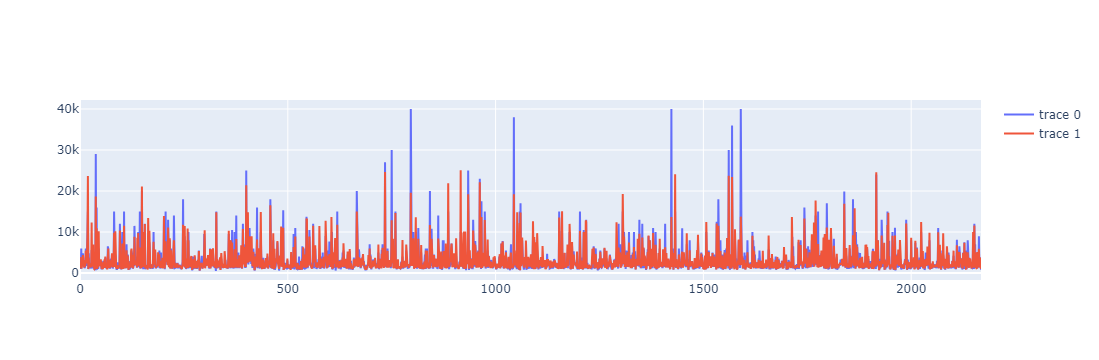

In [78]:
#Criando um gráfico para comparar todos os valores de preços ainda não vistos e o que o modelo achou deles. 
#Ele mostra o valor dos apartamentos e o quanto ele achou que valiam
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                     go.Scatter(y=final_model_predictions)])
fig.show()